In [1]:
import numpy as np

from sklearn import datasets
from sklearn.utils import shuffle

from fromscratchtoml.neighbors import KNeighborsClassifier
from fromscratchtoml.toolbox import binary_visualize

%matplotlib inline

## K Nearest neighbor Algorithm

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]
Y = iris.target[:]
X, Y = shuffle(X, Y, random_state=10)

Xtrain = X[:120]
Ytrain = Y[:120]
Xtest = X[120:]
Ytest = Y[120:]

In [3]:
knn5 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(Xtrain, Ytrain)

KNeighborsClassifier({'n_neighbors': 1})

In [4]:
knn5.predict(Xtest)

array([1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1,
       0, 2, 2, 1, 2, 0, 2, 0])

## The iris data

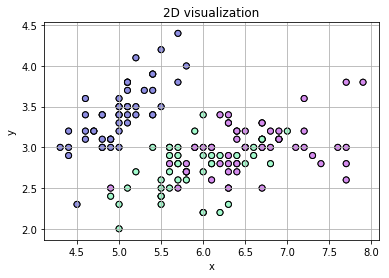

In [5]:
binary_visualize(X, Y, coarse=50, color_seed=1980)

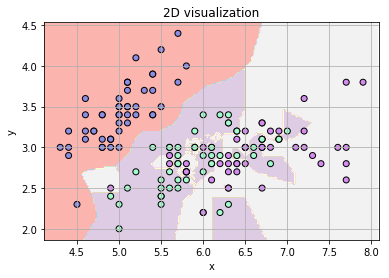

In [6]:
binary_visualize(np.array(X), clf=knn5, draw_contour=True, coarse=50, color_seed=1980)

In [11]:
from bokeh.models import CustomJS, Slider
from bokeh.layouts import column, row

from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
from bokeh.palettes import Set3
output_notebook()

x = Xtrain[:, 0]
y = Xtrain[:, 1]

labels5 = knn5.predict(Xtrain)
colored_y = [Set3[12][int(Ytrain[i])] for i in range(len(Ytrain))]
line_color = ['black' for i in range(len(Ytrain))]

# import pickle
# with open('DBSCAN_fill_colors.pkl', 'rb') as f:
#     fill_colors = pickle.load( f)
    
fill_colors1 = {}
for j in range(2, 11):    
    fill_colors1[j] = [Set3[12][int(Ytrain[i])] for i in range(len(Ytrain))]
    
import pickle
with open('knn_fill_colors.pkl', 'wb') as f:
    pickle.dump(fill_colors1, f)
    
source = ColumnDataSource(data=dict(x=x, y=y, color=colored_y, line_color=line_color))

p = figure(plot_height=300, plot_width=450, title="KNN")
p.circle('x','y', radius=0.06, fill_color='color', source=source, line_color='line_color')

callback = CustomJS(args=dict(source=source, fill_colors1=fill_colors1), code="""
    var data = source.data
    var value = cb_obj.value

    data.color = fill_colors1[value]
    source.change.emit();
""")

slider = Slider(start=2, end=10, value=5, step=1, title="Num Neighbours",
                callback=callback)
layout1 = column(p)



Loading BokehJS ...

In [12]:
Y

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1,
       2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1,
       2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [16]:
from bokeh.models import CustomJS, Slider
from bokeh.layouts import column, row

from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
from bokeh.palettes import Set3
output_notebook()

x = Xtest[:, 0]
y = Xtest[:, 1]

labels5 = knn5.predict(Xtest)
colored_y = [Set3[12][int(labels5[i])] for i in range(len(labels5))]
line_color = ['black' for i in range(len(labels5))]

# import pickle
# with open('DBSCAN_fill_colors.pkl', 'rb') as f:
#     fill_colors = pickle.load( f)
    
fill_colors = {}
for j in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(Xtrain, Ytrain)
    labels = knn.predict(Xtest)
    
    fill_colors[j] = [Set3[12][int(labels[i])] for i in range(len(labels))]
    
import pickle
with open('knn_fill_colors.pkl', 'wb') as f:
    pickle.dump(fill_colors, f)
    
source = ColumnDataSource(data=dict(x=x, y=y, color=colored_y, line_color=line_color))

p = figure(plot_height=300, plot_width=450, title="KNN")
p.circle('x','y', radius=0.06, fill_color='color', source=source, line_color='line_color')

callback = CustomJS(args=dict(source=source, fill_colors=fill_colors), code="""
    var data = source.data
    var value = cb_obj.value

    data.color = fill_colors[value]
    source.change.emit();
""")

slider = Slider(start=2, end=10, value=5, step=1, title="Num Neighbours",
                callback=callback)
layout = row(p, slider)

show(layout)
show(layout1)

Loading BokehJS ...

In [14]:
import pickle
with open('KNN_fill_colors.pkl', 'wb') as f:
    pickle.dump(fill_colors, f)